In [1]:
import os
import pydub
import matplotlib.pyplot as plt

In [5]:
singers=os.listdir("songs")
singers

['Aref', 'Farhad', 'Mohammad Esfahani', 'Mohsen Yeganeh', 'Shadmehr Aghili']

In [31]:
for singer in singers:
    singer_songs =os.listdir(f"songs/{singer}/")
    print(singer_songs)

['Ki Behtar Az To.mp3', 'Soltane Ghalbha.mp3']
['Booye Eydi.mp3', 'Ye Shabe Mahtab.mp3']
['Booye Baran.mp3', 'Deldadegan.mp3']
['Behet Ghol Midam.mp3', 'Darkam Kon.mp3']
['Asemooni.mp3', 'Taghdir.mp3']


In [32]:
singers=os.listdir("songs")
for singer in singers:
    singer_songs =os.listdir(f"songs/{singer}/")
    for singer_song in singer_songs:

        file_path = os.path.join("songs", singer, singer_song)
        print(file_path)

songs\Aref\Ki Behtar Az To.mp3
songs\Aref\Soltane Ghalbha.mp3
songs\Farhad\Booye Eydi.mp3
songs\Farhad\Ye Shabe Mahtab.mp3
songs\Mohammad Esfahani\Booye Baran.mp3
songs\Mohammad Esfahani\Deldadegan.mp3
songs\Mohsen Yeganeh\Behet Ghol Midam.mp3
songs\Mohsen Yeganeh\Darkam Kon.mp3
songs\Shadmehr Aghili\Asemooni.mp3
songs\Shadmehr Aghili\Taghdir.mp3


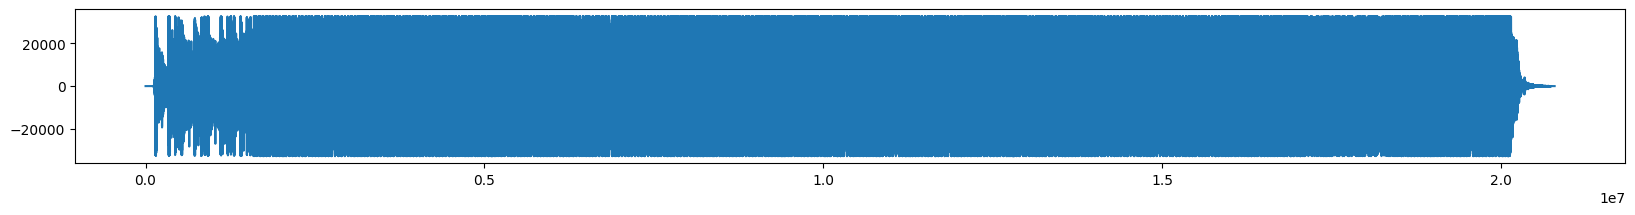

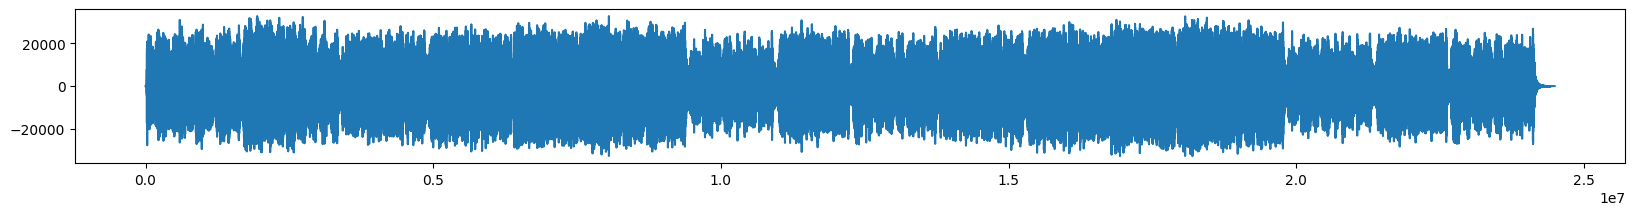

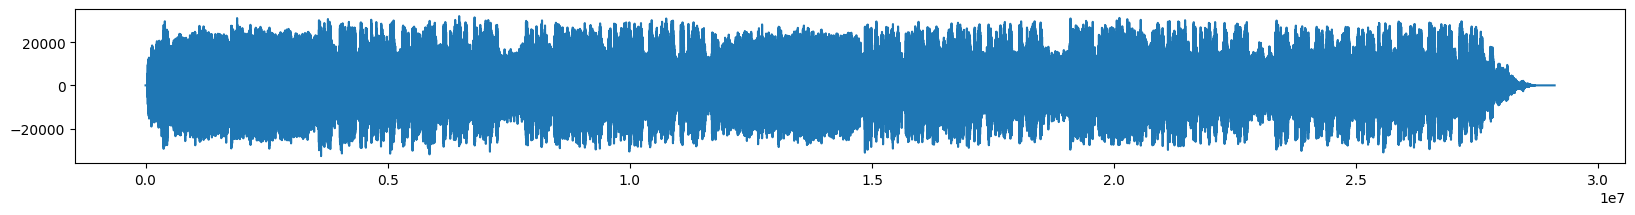

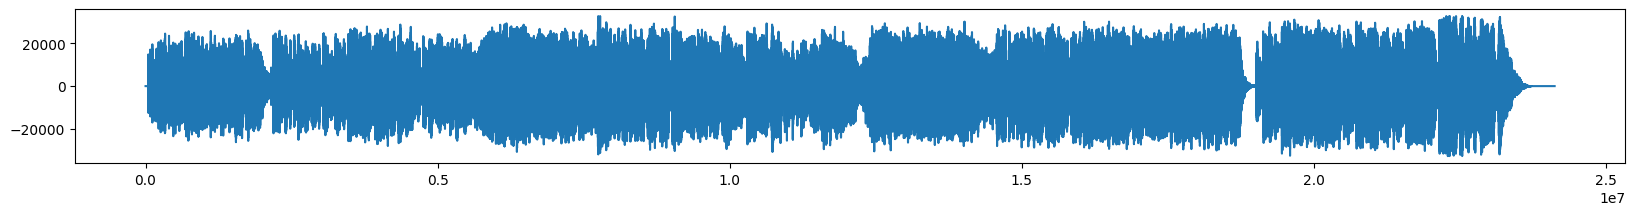

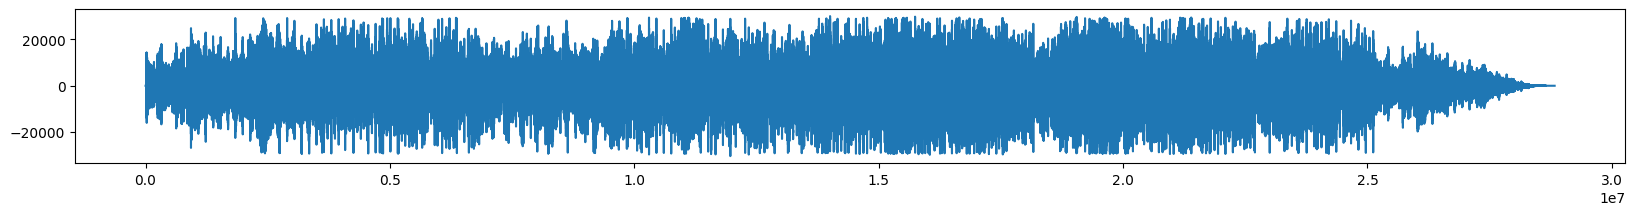

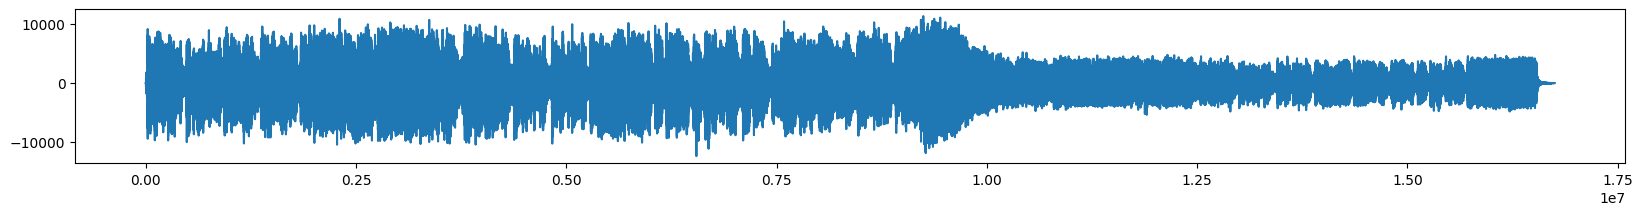

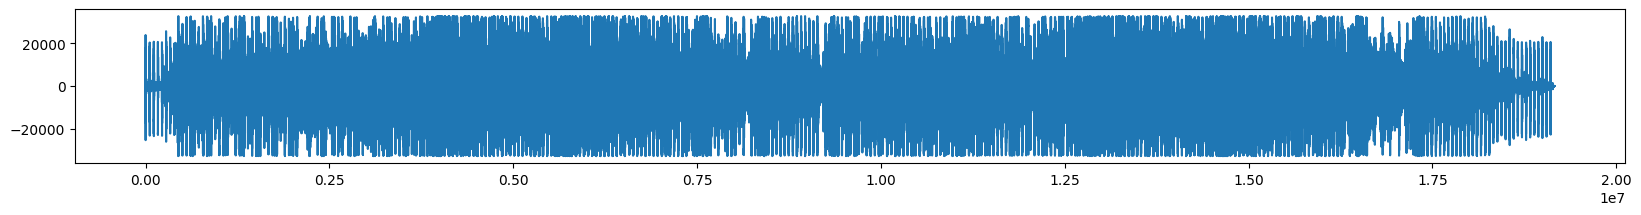

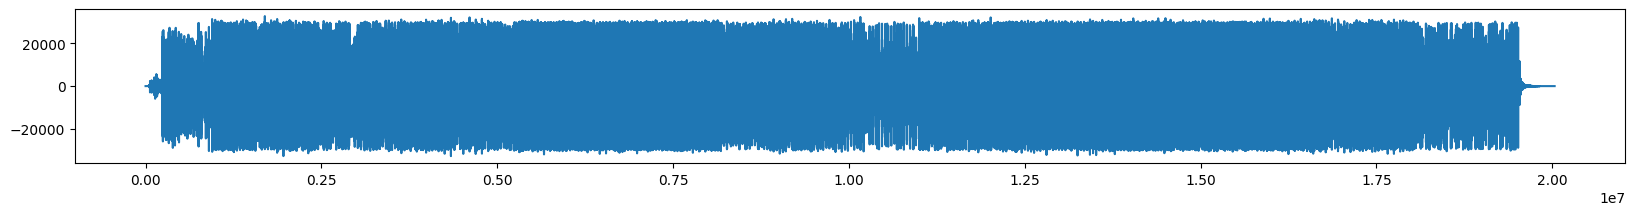

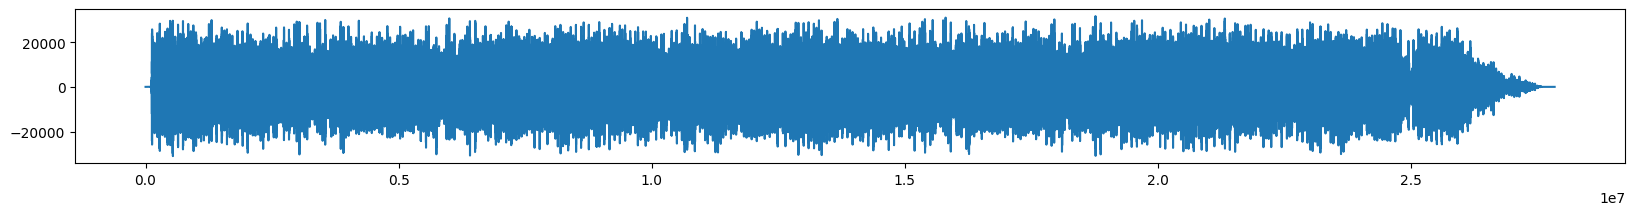

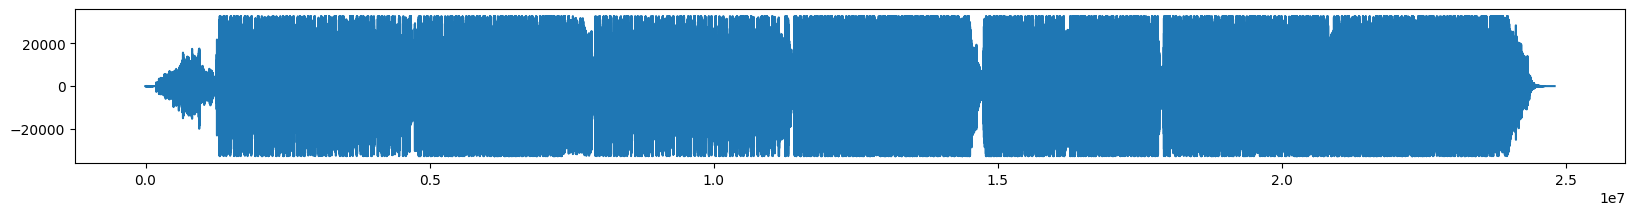

In [33]:
singers=os.listdir("songs")
for singer in singers:
    singer_songs =os.listdir(f"songs/{singer}/")
    os.makedirs(f"wav_data/{singer}" ,exist_ok=True)
    for singer_song in singer_songs:

        file_path = os.path.join("songs", singer, singer_song)

        audio = pydub.AudioSegment.from_file(file_path)

        audio_array = audio.get_array_of_samples()

        plt.figure(figsize=(20, 2))
        plt.plot(audio_array)
        plt.show()

        audio = audio.set_sample_width(2)  # convert to 16-bit (2 bytes per sample) to avoid tensorflow error
        audio = audio.set_frame_rate(48000)
        audio = audio.set_channels(1)  # convert stereo audio to mono audio to avoid tensorflow error

        chunks = pydub.silence.split_on_silence(audio, min_silence_len=2000, silence_thresh=-45)
        result = sum(chunks)
        file_name = singer_song.split(".")[0]

        result.export(f"wav_data/{singer}/{file_name}.wav")

In [3]:
for folder in os.listdir("wav_data"):
    for file in os.listdir(f"wav_data/{folder}"):

        file_path = os.path.join("wav_data", folder, file)
        audio = pydub.AudioSegment.from_file(file_path)
        
        song_name = file.split(".")[0]
        folder_path = os.path.join("dataset", folder, song_name)
        os.makedirs(folder_path, exist_ok=True)

        chunks = pydub.utils.make_chunks(audio, 1000)

        for i , chunk in enumerate(chunks):
            if len(chunk) < 1000 :
                continue
            chunk.export(os.path.join("dataset", folder, song_name, f"voice{i}.wav"), format="wav")